# Detecting Covid-19 with Keras neural network

## 0. Import and loading

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
covid_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Covid-19'
normal_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Normal'
viral_path = r'D:\MasterBigData\Didattica\DL\Progetto\576013_1042828_bundle_archive\COVID-19 Radiography Database\images\Viral'
paths = [covid_path, normal_path, viral_path]

In [45]:
%%time
X=[]
y=[]
for i in range(len(paths)):
    images = [f for f in os.listdir(paths[i])]
    for image in images:
        img = load_img(paths[i]+'\\\\'+image, target_size=(250, 250))
        img = img_to_array(img)
        X.append(img)
        y.append(i)
print(X)
print(y)

[array([[[ 46.,  44.,  45.],
        [ 54.,  53.,  54.],
        [ 60.,  58.,  59.],
        ...,
        [ 91.,  90.,  91.],
        [ 70.,  71.,  71.],
        [ 55.,  53.,  56.]],

       [[ 53.,  51.,  52.],
        [ 53.,  51.,  53.],
        [ 58.,  56.,  56.],
        ...,
        [ 70.,  70.,  72.],
        [ 78.,  77.,  80.],
        [ 67.,  67.,  69.]],

       [[ 52.,  50.,  53.],
        [ 54.,  54.,  55.],
        [ 58.,  58.,  59.],
        ...,
        [ 81.,  81.,  83.],
        [ 64.,  64.,  66.],
        [ 58.,  56.,  59.]],

       ...,

       [[ 72.,  71.,  73.],
        [ 80.,  80.,  82.],
        [ 65.,  65.,  67.],
        ...,
        [ 73.,  73.,  75.],
        [100., 101., 103.],
        [ 89.,  89.,  91.]],

       [[ 81.,  81.,  83.],
        [ 69.,  69.,  71.],
        [ 67.,  67.,  69.],
        ...,
        [ 80.,  80.,  82.],
        [ 86.,  86.,  88.],
        [ 94.,  93.,  95.]],

       [[ 77.,  78.,  78.],
        [ 64.,  65.,  67.],
        [ 66., 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [47]:
#abbiamo verificato che lo split mantiene inalterate le proporzioni
import pandas as pd

print('all:')
print(pd.Series(y).value_counts(normalize=True))
print()
print('train:')
print(pd.Series(y_train).value_counts(normalize=True))
print()
print('test:')
print(pd.Series(y_test).value_counts(normalize=True))

all:
2    0.465237
1    0.463853
0    0.070910
dtype: float64

train:
2    0.465398
1    0.463668
0    0.070934
dtype: float64

test:
2    0.464594
1    0.464594
0    0.070812
dtype: float64


In [48]:
#target in forma vettoriale
from keras.utils.np_utils import to_categorical
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

In [49]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train_labels, y_test_labels =  np.array(y_train_labels), np.array(y_test_labels)

## 1. Our models

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D
from keras.optimizers import RMSprop

In [51]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', 
                                                  np.unique(y_train),
                                                  y_train)

for _class in np.unique(y_train):
    print(f"Weight of instances in class {_class:d}: {class_weights[_class]:.2f}")

Weight of instances in class 0: 4.70
Weight of instances in class 1: 0.72
Weight of instances in class 2: 0.72


In [58]:
model = Sequential()

model.add( Conv2D(32, (3, 3), input_shape=(250, 250, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(64, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(128, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Conv2D(256, (3, 3))) 
model.add( Activation("relu") )
model.add( MaxPooling2D((2, 2)) )

model.add( Flatten() )
model.add( Dense(128) )
model.add( Activation("relu") )

model.add(Dense(3, activation='softmax'))

model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [59]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
activation_27 (Activation)   (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_28 (Activation)   (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 59, 59, 128)      

## 2. Fitting

In [60]:
hist = model.fit(X_train, y_train_labels, 
                 class_weight=class_weights,
                 batch_size=32, epochs=20)

Epoch 1/20
2312/2312 [==============================] - 127s 55ms/step - loss: 90.3675 - accuracy: 0.6138
Epoch 2/20
2312/2312 [==============================] - 136s 59ms/step - loss: 2.2262 - accuracy: 0.7690
Epoch 3/20
2312/2312 [==============================] - 134s 58ms/step - loss: 1.2421 - accuracy: 0.8296
Epoch 4/20
2312/2312 [==============================] - 135s 58ms/step - loss: 1.2922 - accuracy: 0.8400
Epoch 5/20
2312/2312 [==============================] - 136s 59ms/step - loss: 0.3987 - accuracy: 0.8789
Epoch 6/20
2312/2312 [==============================] - 135s 59ms/step - loss: 0.5239 - accuracy: 0.8780
Epoch 7/20
2312/2312 [==============================] - 135s 59ms/step - loss: 0.6653 - accuracy: 0.8906
Epoch 8/20
2312/2312 [==============================] - 135s 59ms/step - loss: 0.4137 - accuracy: 0.9196
Epoch 9/20
2312/2312 [==============================] - 135s 58ms/step - loss: 0.2183 - accuracy: 0.9338
Epoch 10/20
2312/2312 [==============================]

## 3. Evaluation

Accuracy: 0.9814014


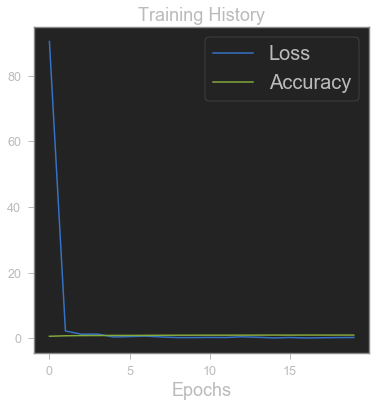

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['loss'], label='Loss')
axes.plot(hist.history['accuracy'], label='Accuracy')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['accuracy'][-1])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# convert form prediction to id
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

y_true = y_test

# compute confusion matrix
print ("Confusion Matrix")
print ( confusion_matrix(y_true, y_pred) )
print()

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

Confusion Matrix
[[ 36   2   3]
 [  0 259  10]
 [  3  13 253]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.95      0.96      0.95       269
           2       0.95      0.94      0.95       269

    accuracy                           0.95       579
   macro avg       0.94      0.93      0.93       579
weighted avg       0.95      0.95      0.95       579



In [65]:
#comando per salvare il modello
model.save(r'D:\MasterBigData\Didattica\DL\Progetto\Detecting-COVID\model_1')

# Augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
                                ##augmentation parameters:
                                  # ,shear_range=0.2, 
                                  # zoom_range=0.2, 
                                  # horizontal_flip=True)
                                  
train_images = train_datagen.flow_from_directory(train_path,
                     target_size=(256, 256),
                     batch_size=32,
                     color_mode="rgb",
                     class_mode="categorical"
                     #shuffle=True,
                     #seed=42
                            )